In [100]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pint
import os
import pandas as pd
import itertools

In [3]:
unit = pint.UnitRegistry()

RAW Data

In [102]:

file_path1 = "DATA/Magnetic_Field_Inside_Solenoid_Table_3_12.csv"
file_path2 = "DATA/Magnetic_Field_Outside_Solenoid_Table_3_1.csv"

fig_path = "output_plots/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

inside_feild_data = pd.read_csv(file_path1)
outside_feild_data = pd.read_csv(file_path2)



# Display the data
print("(Table 3.12):")
print(inside_feild_data.head())

print("\n(Table 3.1):")

outside_feild_data["tan\\alpha"] = np.tan(np.radians(outside_feild_data["\\alpha"]))
B_y = 26 * unit.microtesla
B = lambda alpha: B_y * (np.tan(np.radians(alpha)) *unit.dimensionless)
outside_feild_data[ "B (\\muT)"] = B(outside_feild_data["\\alpha"])

print(outside_feild_data.head())


(Table 3.12):
   x (mm)  (n:75 turns 2a:26mm) B (mT)  (n:150 turns 2a:26mm) B (mT)  \
0       0                         0.02                          0.00   
1      10                         0.02                          0.02   
2      20                         0.03                          0.03   
3      30                         0.04                          0.12   
4      40                         0.11                          0.34   

   (n:300 turns 2a:26mm) B (mT)  (n:300 turns 2a:33mm) B (mT)  \
0                          0.00                          0.00   
1                          0.02                          0.02   
2                          0.07                          0.08   
3                          0.27                          0.23   
4                          0.68                          0.53   

   (n:300 turns 2a:41mm) B (mT)  
0                          0.00  
1                          0.10  
2                          0.22  
3                         

c:\Users\Pc\Drive’ım (ibrahim.hamed2701@gmail.com)\Academic Archive\Istanbul University\Cource Contents\Physics\LAB\Physics Electric Lab\venv\Lib\site-packages\pandas\core\construction.py:630: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


In [5]:
inside_feild_data.to_csv(file_path1, index=False)  # Update the file (Table 3.12)
outside_feild_data.to_csv(file_path2, index=False)  # Update the file (Table 3.1)

print(outside_feild_data["B (\\muT)"][2])

12.681047302712397


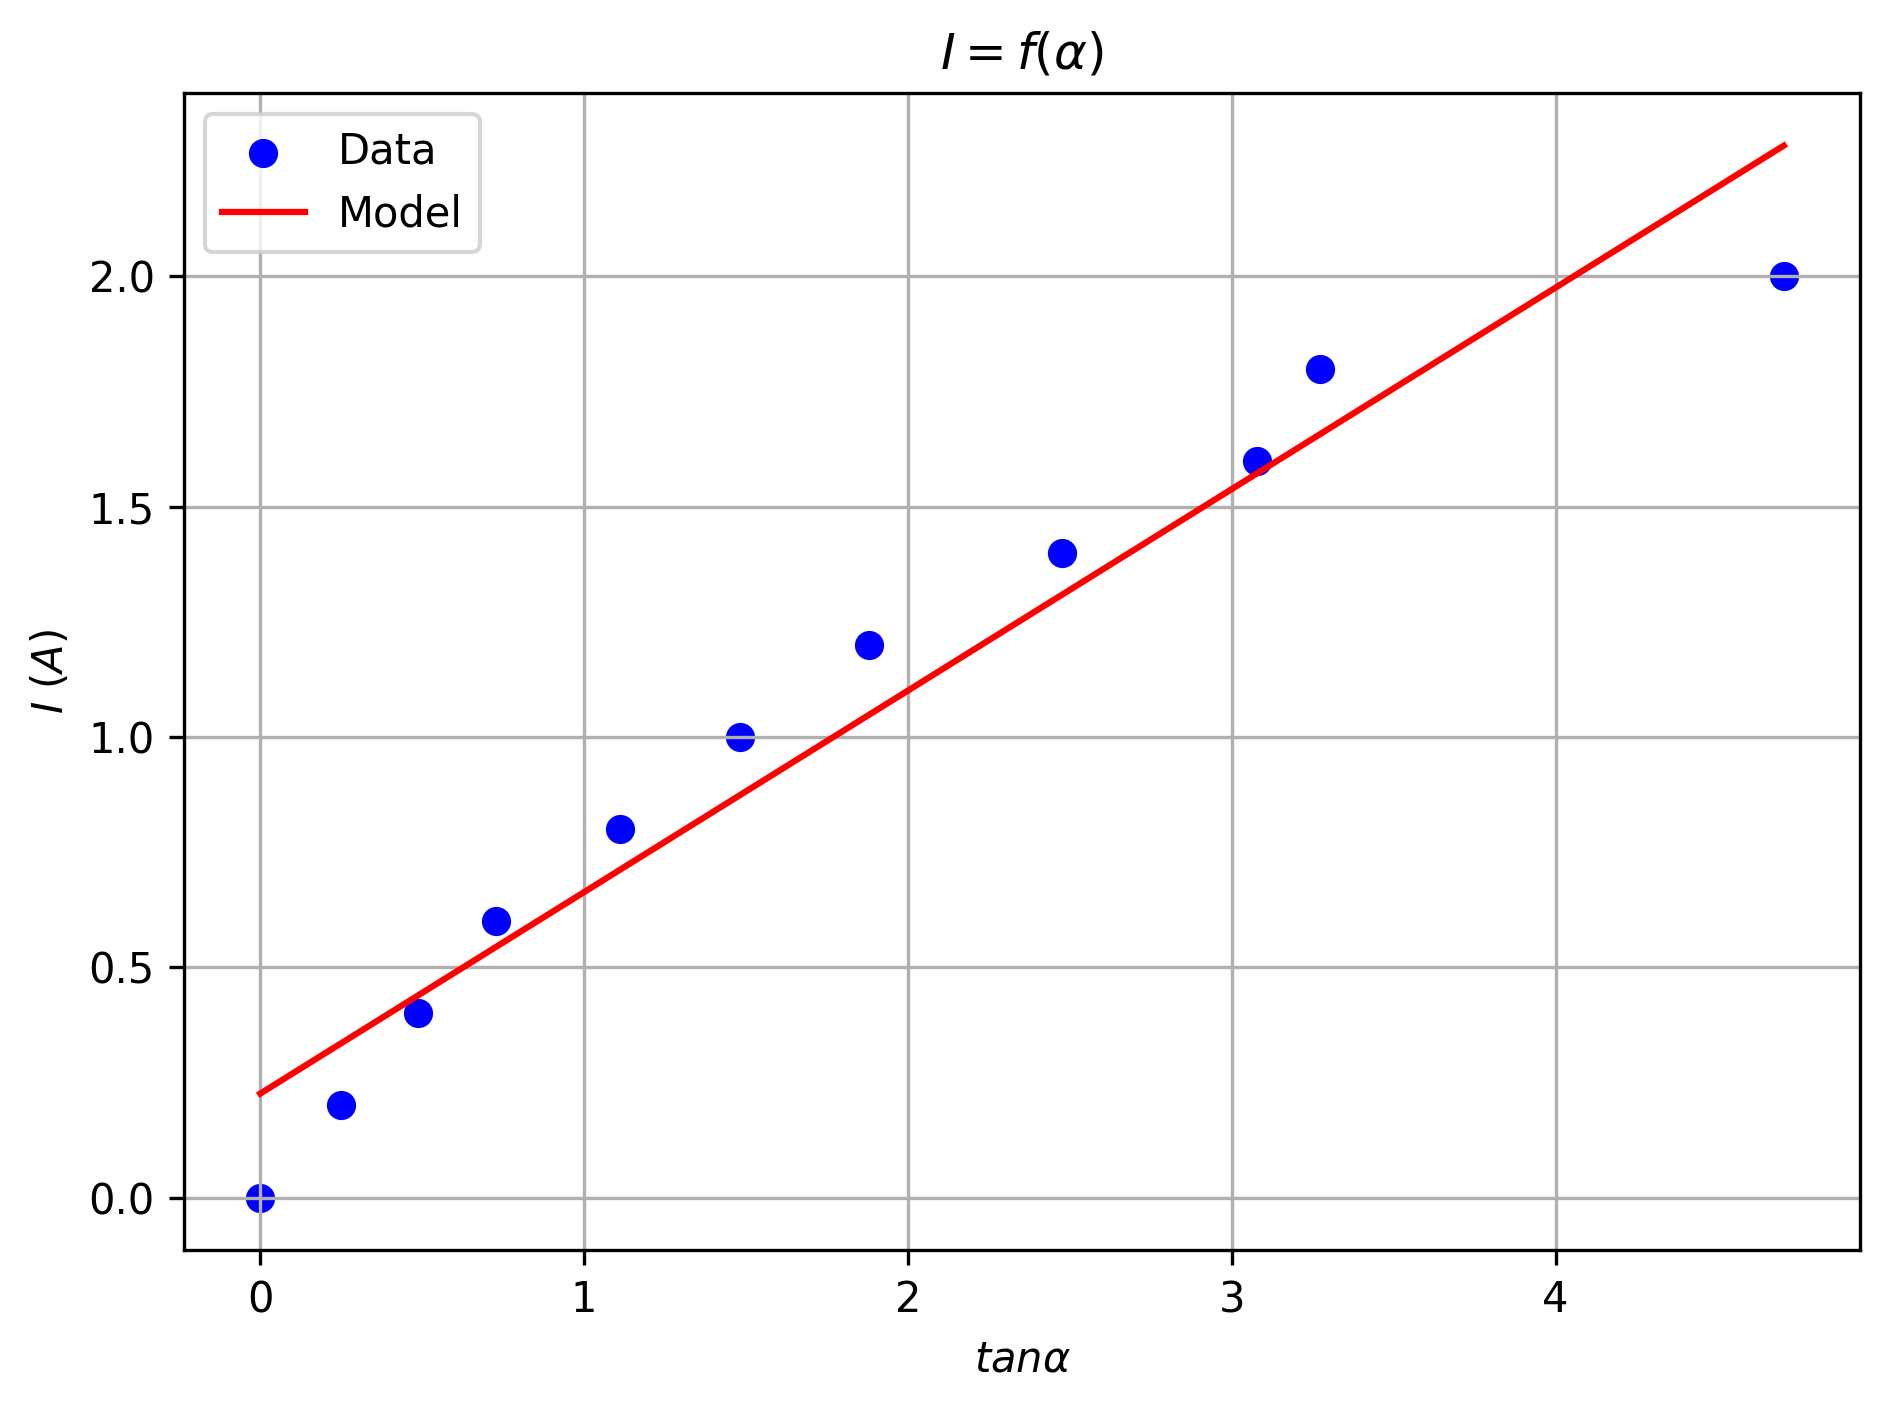

In [55]:
outside_ex_current = outside_feild_data["I (A)"].to_numpy()
outside_ex_tangante_alpha = outside_feild_data["tan\\alpha"].to_numpy()

model_outside = LinearRegression()
model_outside.fit(outside_ex_tangante_alpha.reshape(-1,1), outside_ex_current)
outside_line_space = np.linspace(min(outside_ex_tangante_alpha), max(outside_ex_tangante_alpha))
reg = model_outside.predict(outside_line_space.reshape(-1,1))

plt.figure(dpi=300)

plt.grid(True)
plt.scatter(outside_ex_tangante_alpha, outside_ex_current,c ="b", label="Data")
plt.plot(outside_line_space, reg, c="r", label="Model")

plt.ylabel("$I$ $(A)$")
plt.xlabel("$tan\\alpha$")
plt.title("$I = f(\\alpha)$")
plt.tight_layout()
plt.legend()

plt.savefig(fig_path+"current_vs_tan_alpha.jpg")
plt.show()

In [97]:
for i in inside_feild_data.columns:
    print(i)

x (mm)
(n:75 turns 2a:26mm) B (mT)
(n:150 turns 2a:26mm) B (mT)
(n:300 turns 2a:26mm) B (mT)
(n:300 turns 2a:33mm) B (mT)
(n:300 turns 2a:41mm) B (mT)


In [98]:
for column_name in inside_feild_data.columns:
    if column_name != "x (mm)":
        print(i)

(n:300 turns 2a:41mm) B (mT)
(n:300 turns 2a:41mm) B (mT)
(n:300 turns 2a:41mm) B (mT)
(n:300 turns 2a:41mm) B (mT)
(n:300 turns 2a:41mm) B (mT)


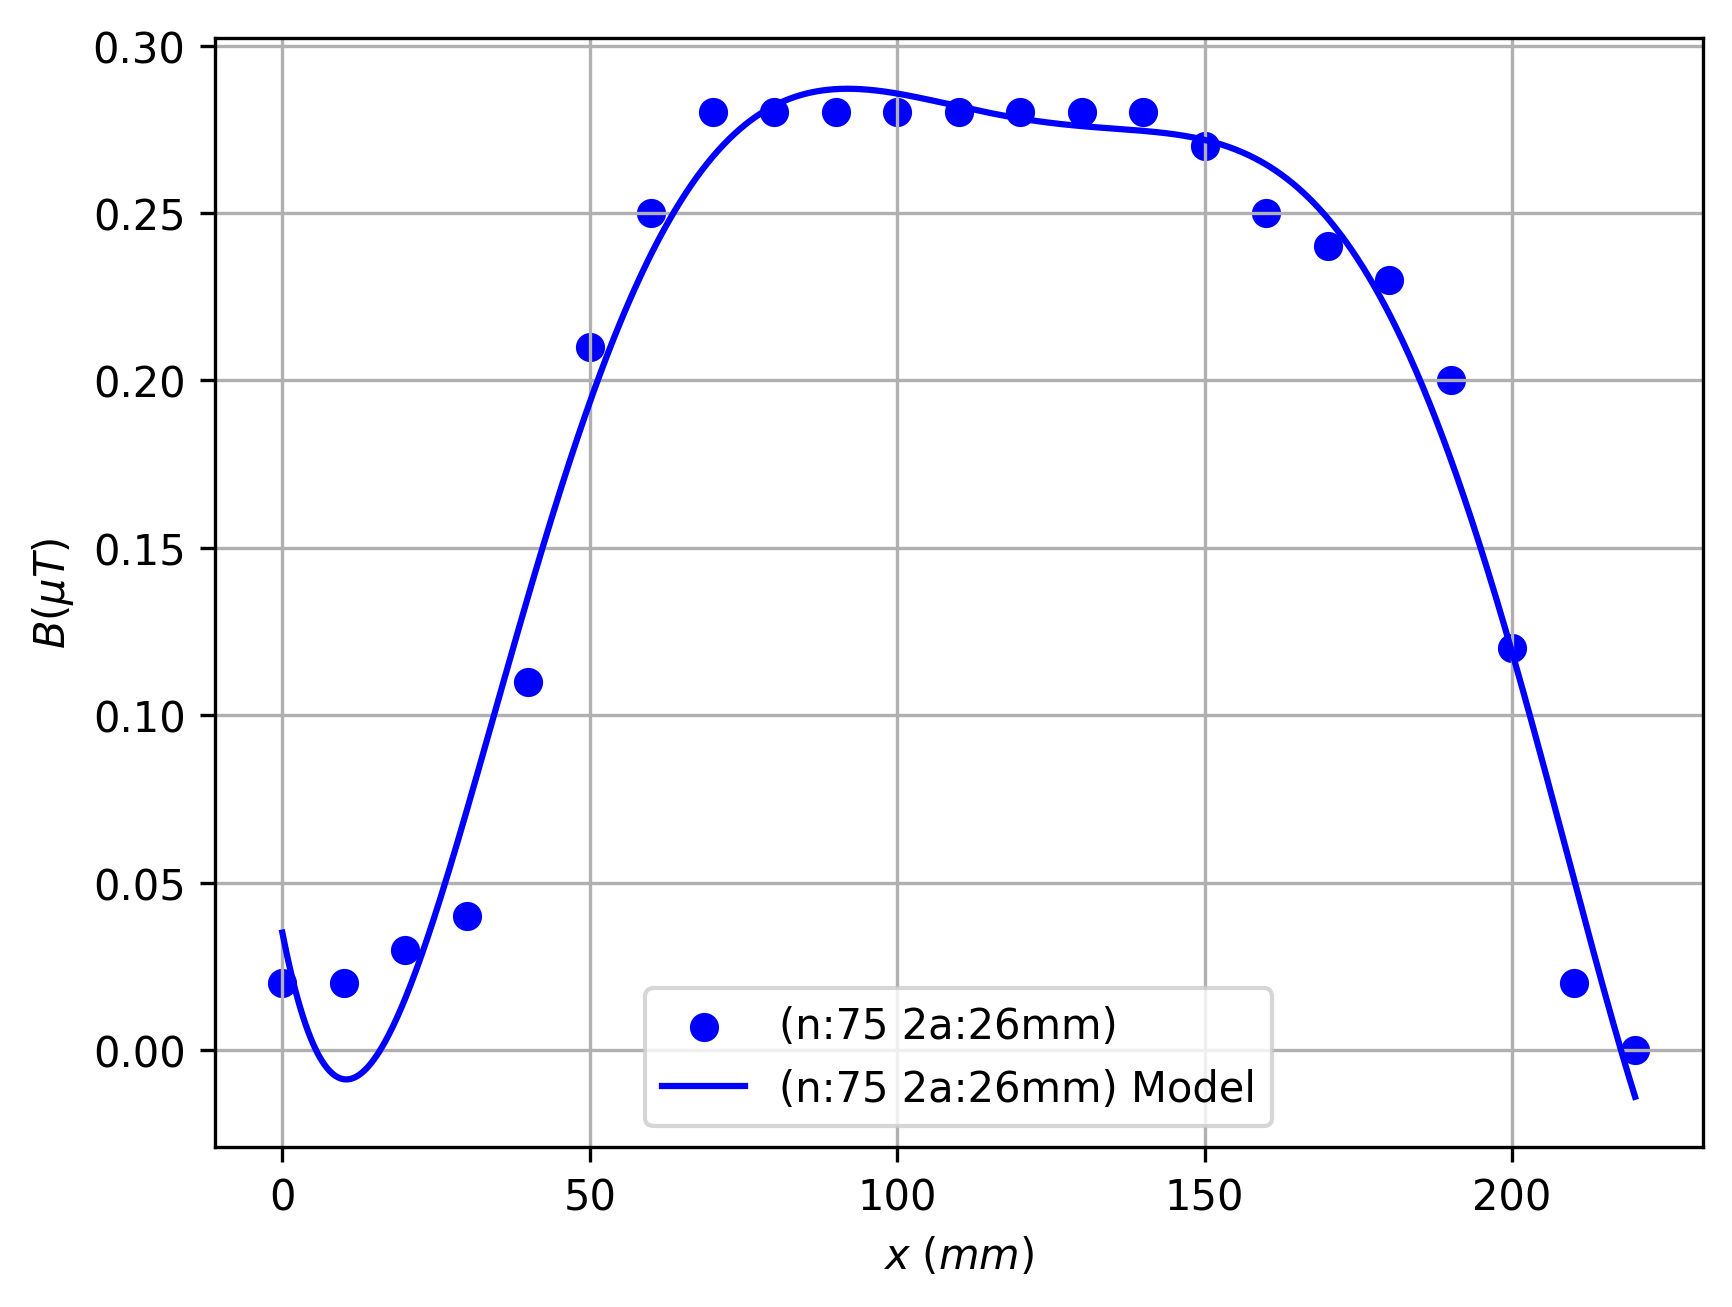

<Figure size 640x480 with 0 Axes>

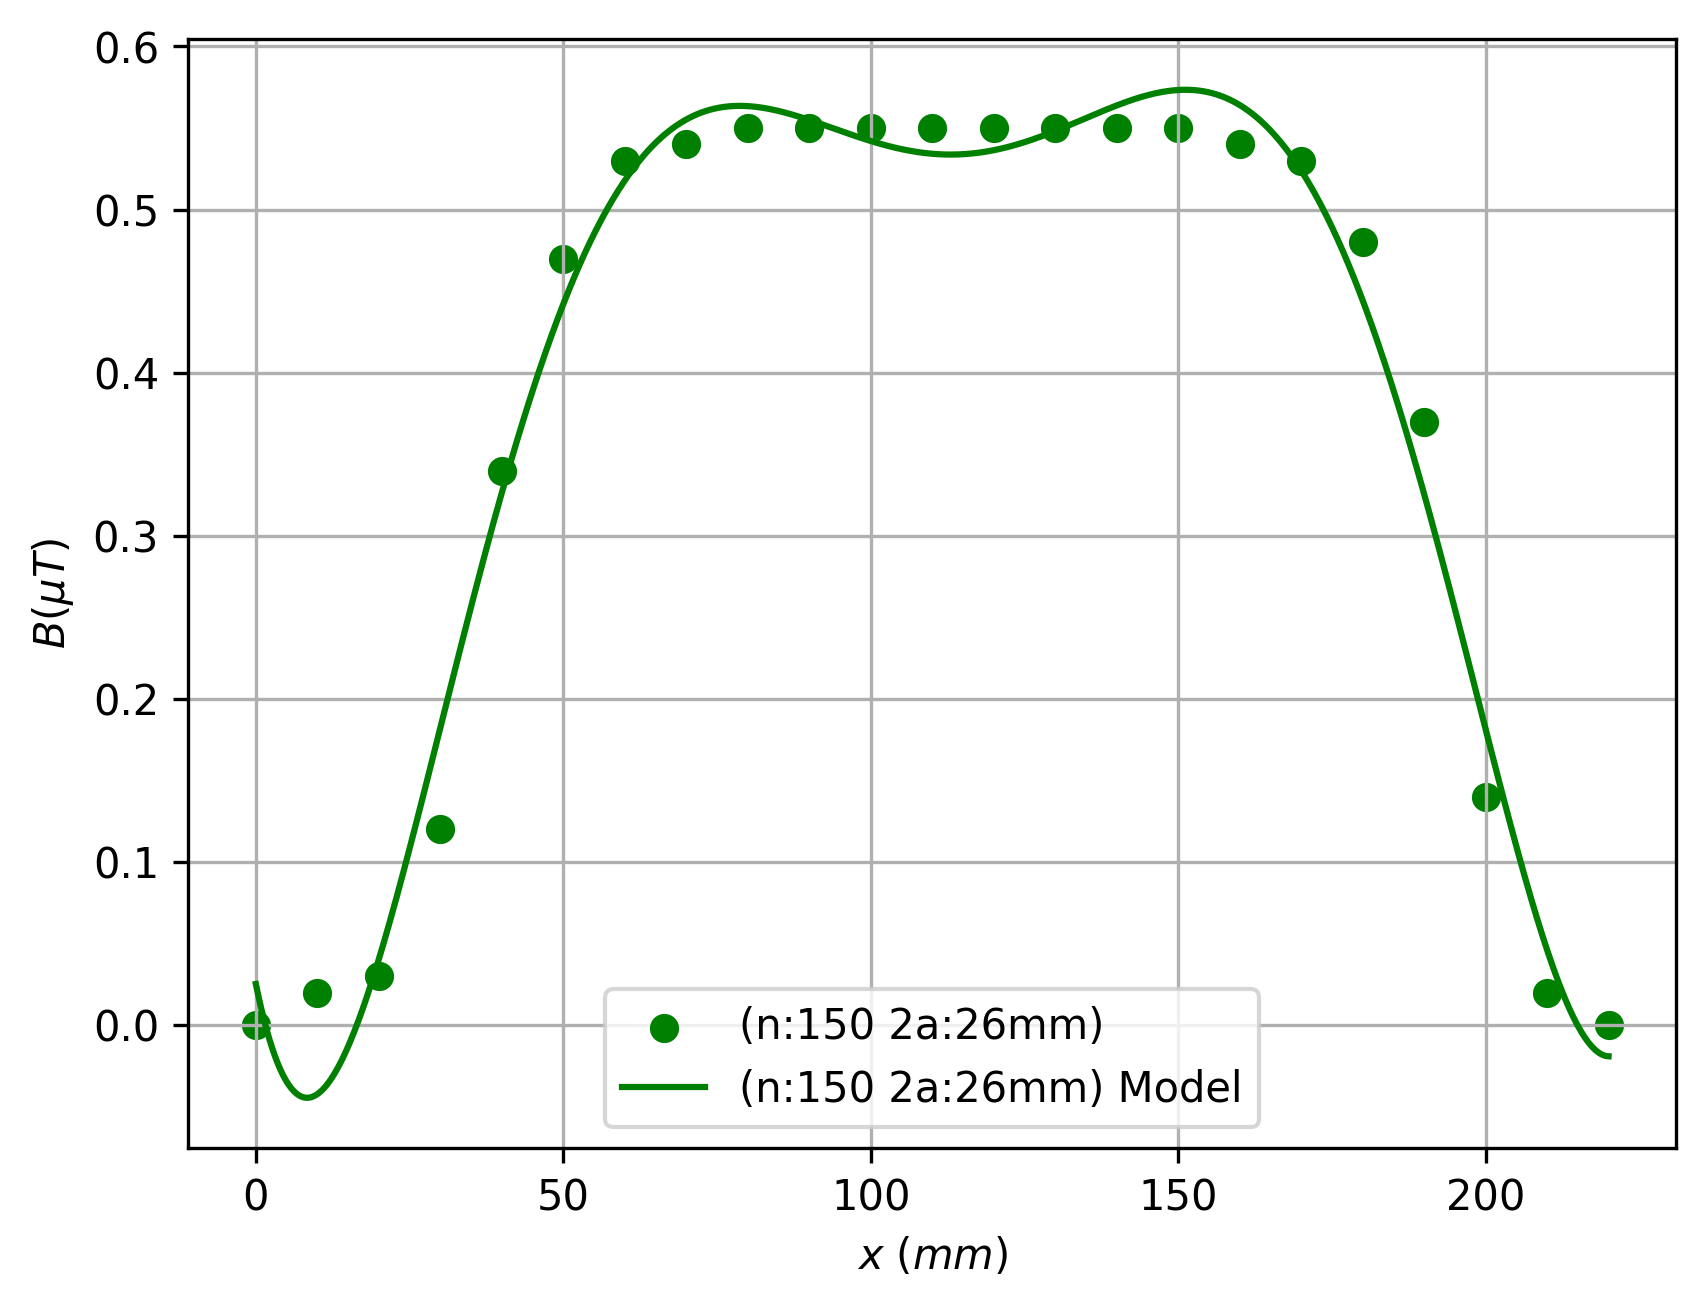

<Figure size 640x480 with 0 Axes>

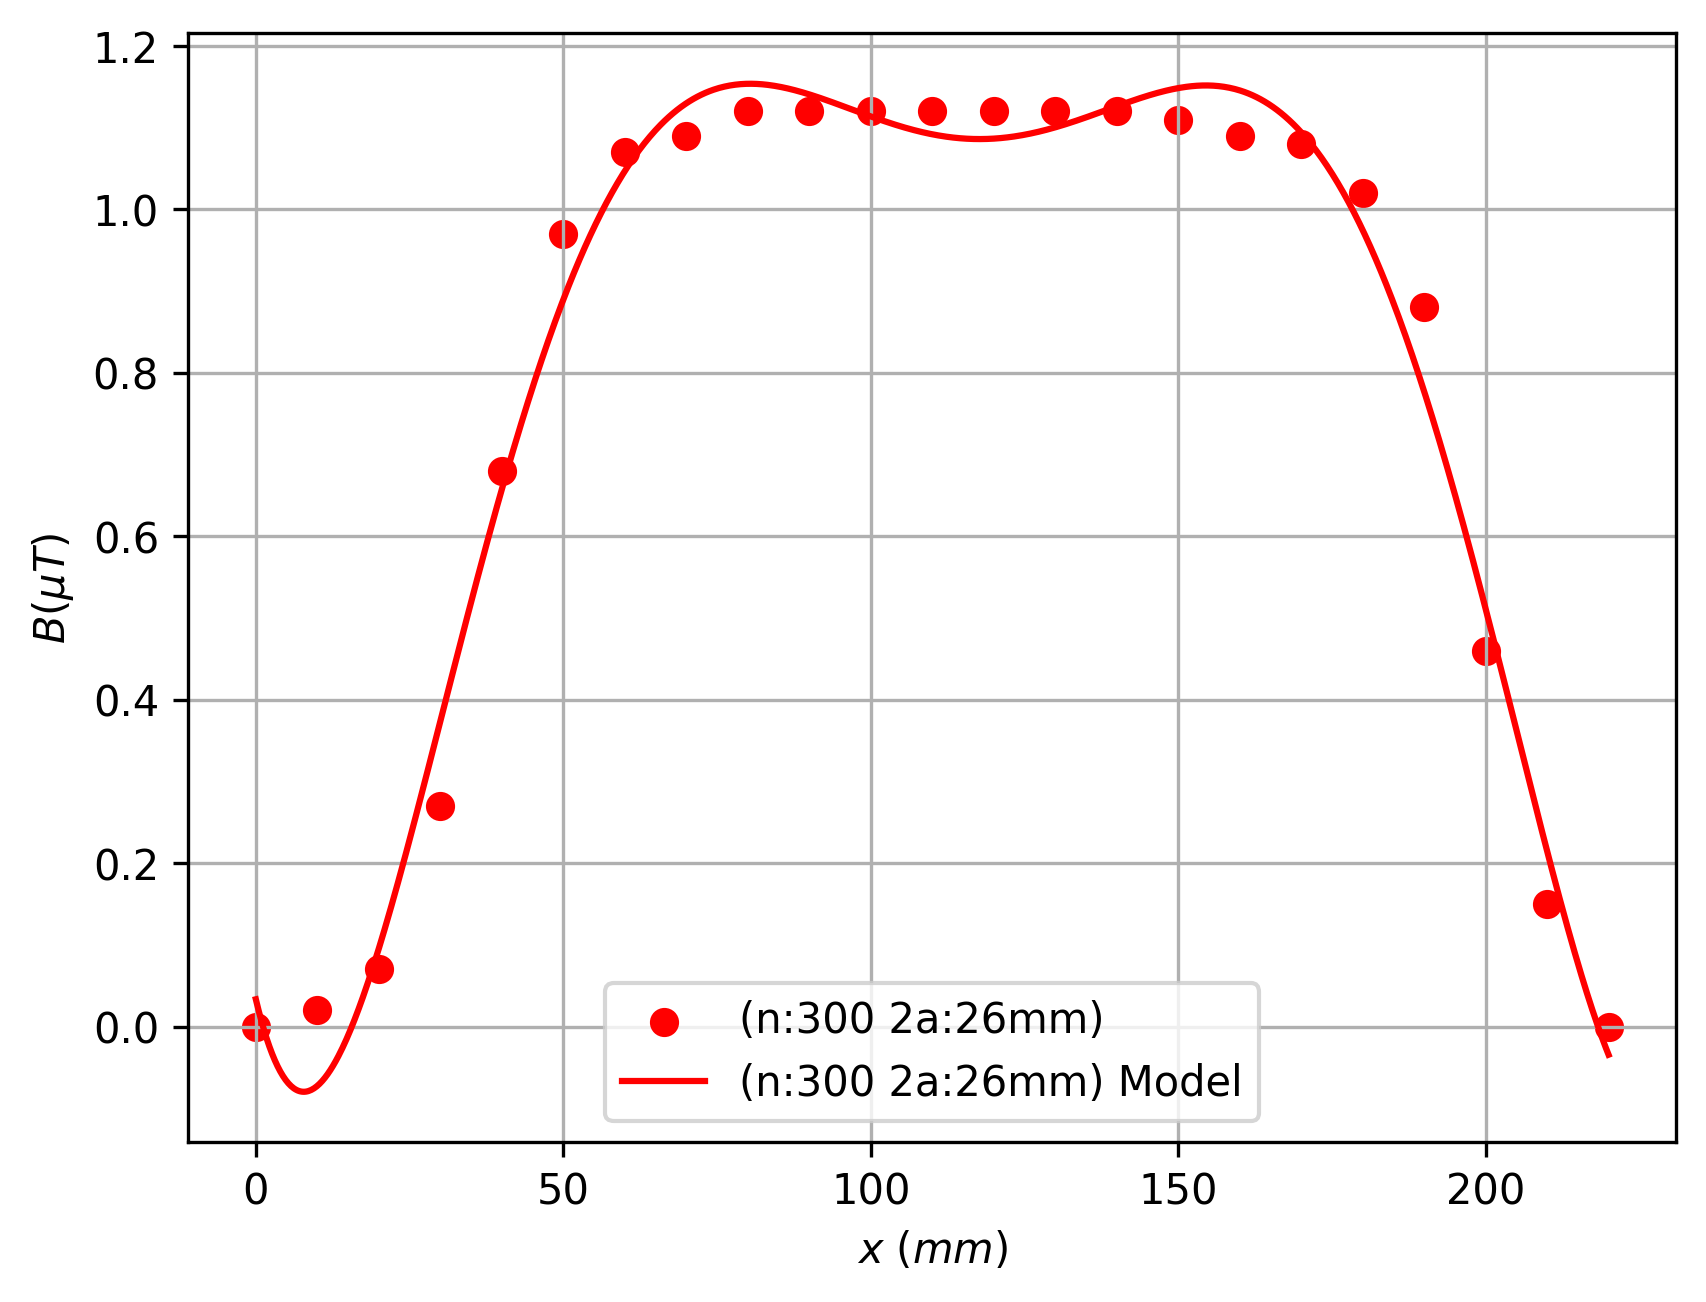

<Figure size 640x480 with 0 Axes>

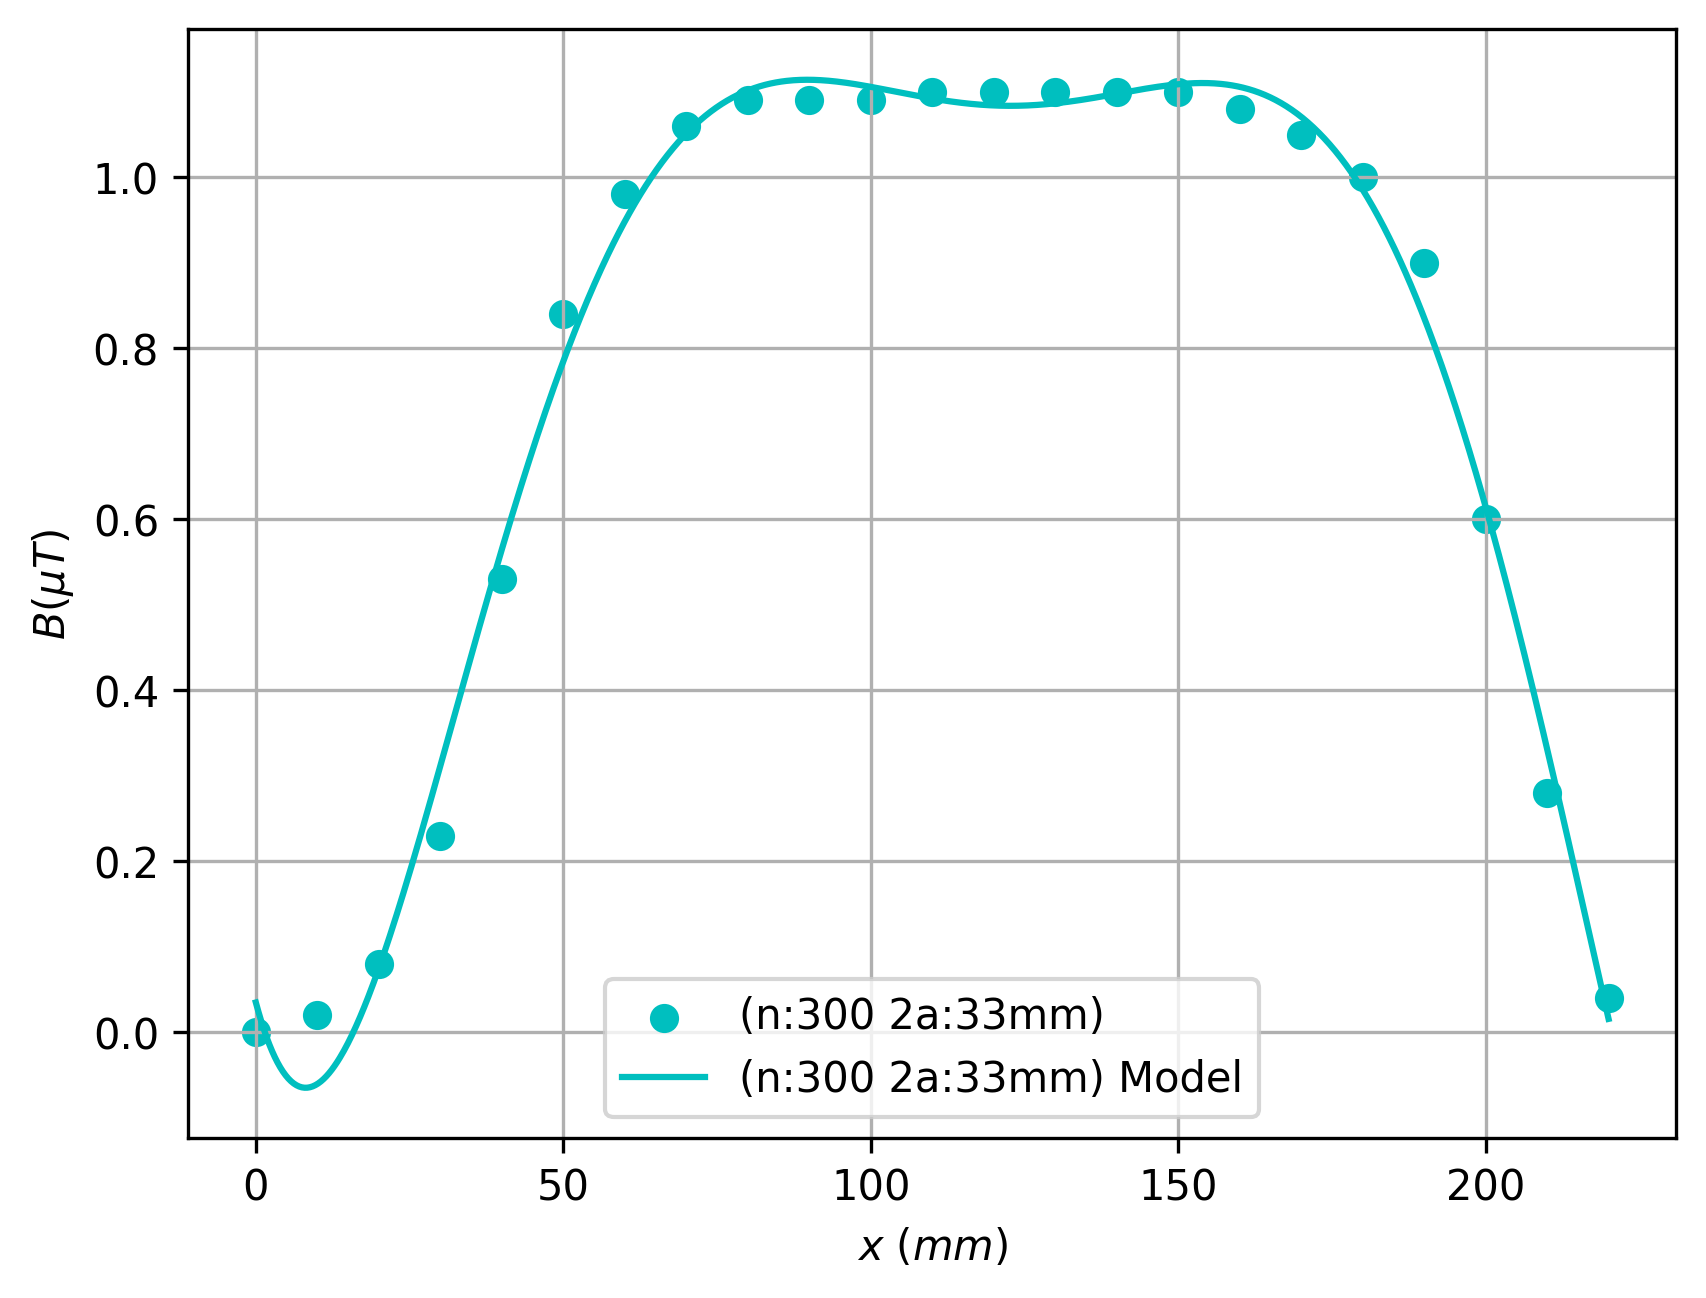

<Figure size 640x480 with 0 Axes>

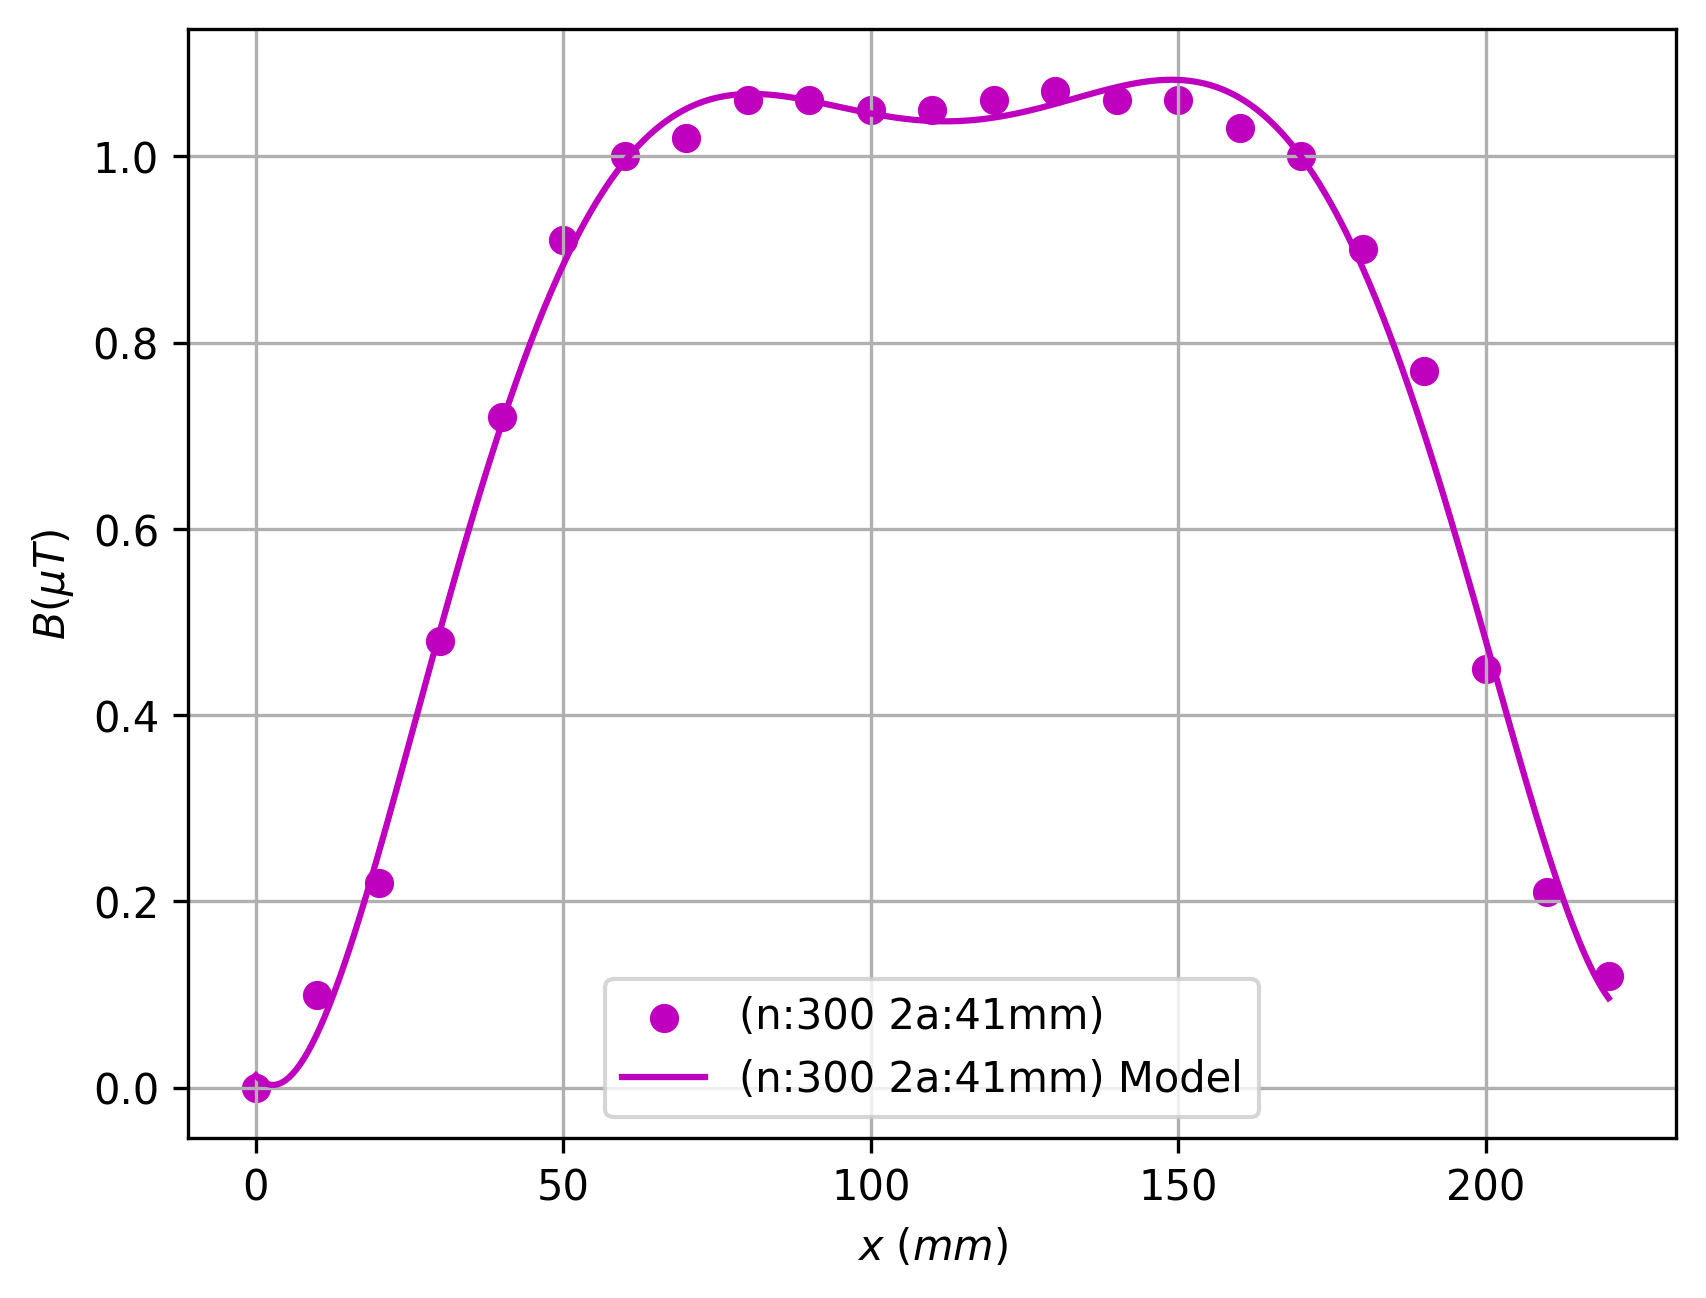

<Figure size 640x480 with 0 Axes>

In [ ]:
Degree = 6
X_mm = inside_feild_data["x (mm)"].to_numpy().reshape(-1,1)
poly_features = PolynomialFeatures(degree=Degree)
X_poly = poly_features.fit_transform(X_mm)
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])


for column_name in inside_feild_data.columns:
    if column_name != "x (mm)":
        plt.figure(dpi=300)
        color = next(colors)

        y = inside_feild_data[column_name]
        model = LinearRegression()
        model.fit(X_poly, y)
        line_space = np.linspace(min(X_mm), max(X_mm),1000).reshape(-1,1)
        poly_line_space = poly_features.fit_transform(line_space)
        prediction = model.predict(poly_line_space)

        plt.scatter(X_mm, y, label=column_name.replace(" B (mT)", "").replace("turns ", ""), c=color)
        plt.plot(line_space,prediction, label=column_name.replace(" B (mT)", "").replace("turns ", "")+" Model", c=color)
        
        plt.grid(True)
        plt.ylabel(r"$B (\mu T)$")
        plt.xlabel(r"$x$ $(mm)$")
        plt.legend()        
        file_name= column_name.replace("turns ", "").replace(":", "_").replace(" ", "_")
        plt.savefig(fig_path+f"{file_name}.jpg", dpi=300)
        plt.show()





        




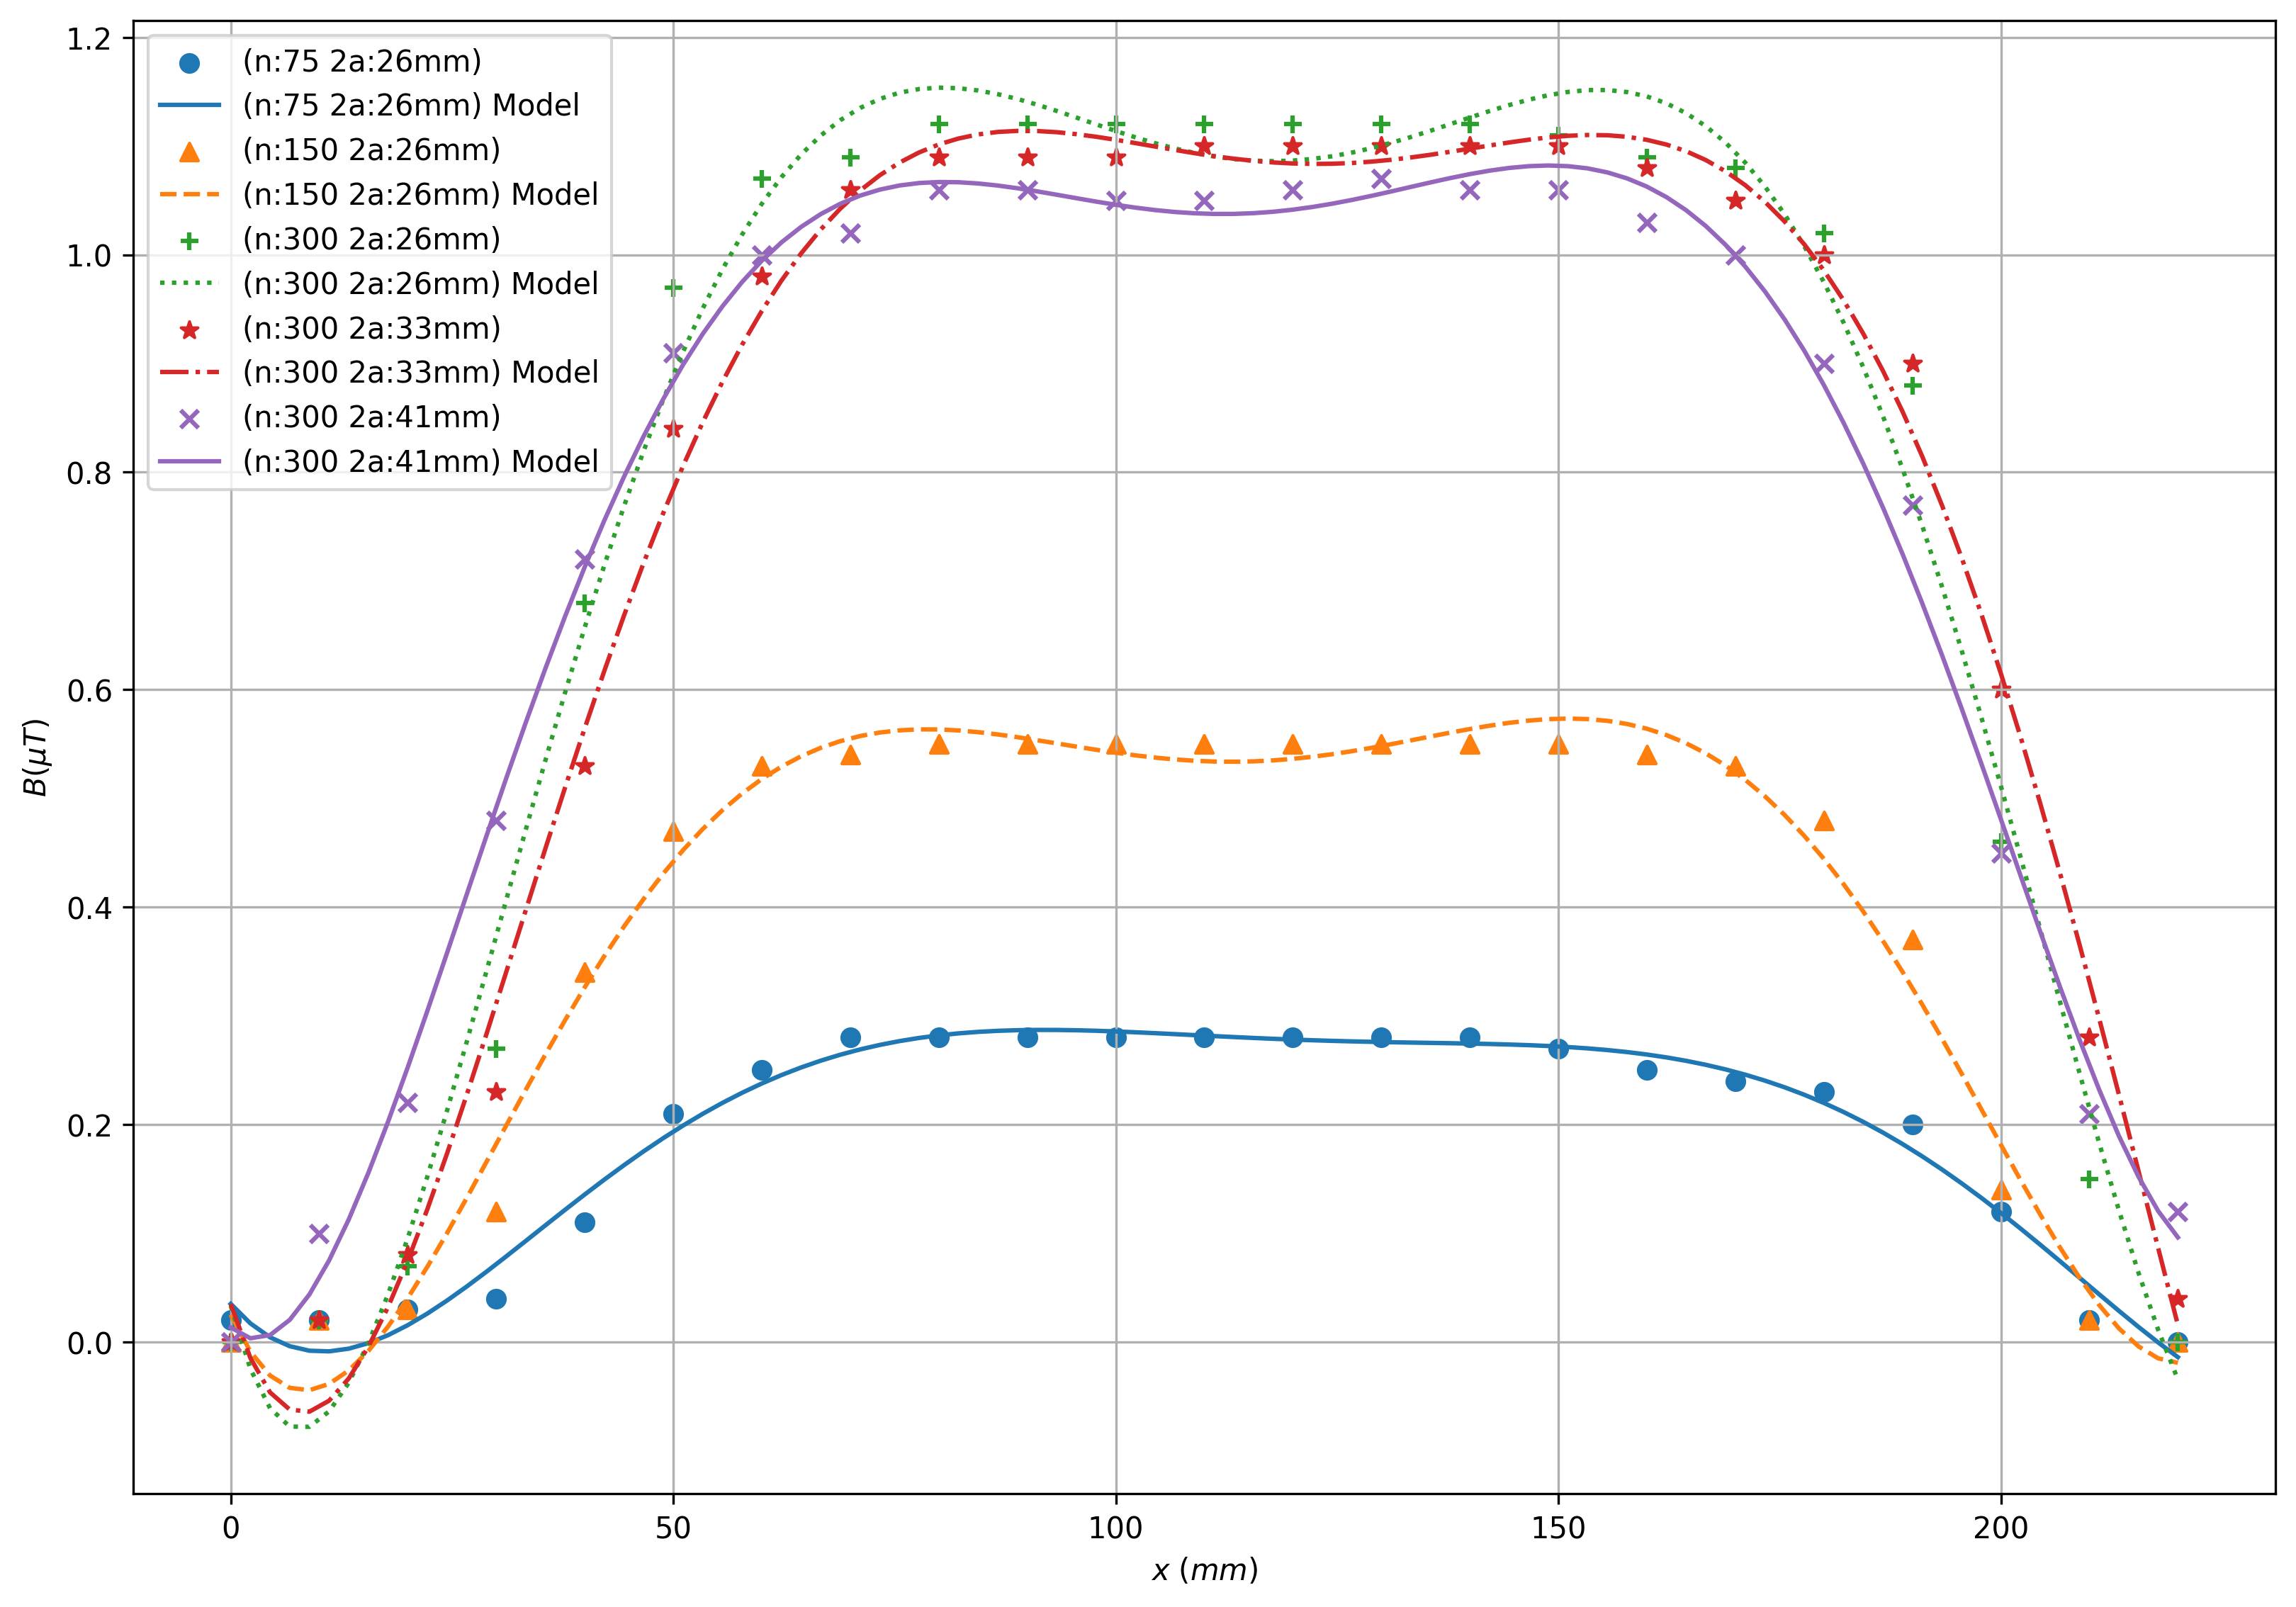

In [172]:

Degree = 6
X_mm = inside_feild_data["x (mm)"].to_numpy().reshape(-1, 1)
poly_features = PolynomialFeatures(degree=Degree)
X_poly = poly_features.fit_transform(X_mm)

# Define marker and line styles
markers = itertools.cycle(['o', '^', '+',  '*','x','s', 'D', 'v', '<', '>', 'P',  ',', '1', '2', '3'])
linestyles = itertools.cycle(['-', '--', ':', '-.', '-', '--', ':', '-.', '-'])

# Create a single figure before the loop
plt.figure(figsize=(13,9),dpi=300)

for column_name in inside_feild_data.columns:
    if column_name != "x (mm)":
        # Cycle through markers and line styles
        marker = next(markers)
        linestyle = next(linestyles)

        y = inside_feild_data[column_name]
        model = LinearRegression()
        model.fit(X_poly, y)
        
        # Generate a space for plotting the regression line
        line_space = np.linspace(min(X_mm), max(X_mm), 100).reshape(-1, 1)
        poly_line_space = poly_features.transform(line_space)
        prediction = model.predict(poly_line_space)

        # Plot the scatter points with a specific marker
        plt.scatter(X_mm, y, label=column_name.replace(" B (mT)", "").replace("turns ", ""), marker=marker)

        # Plot the regression line with a specific line style
        plt.plot(line_space, prediction, label=f'{column_name.replace(" B (mT)", "").replace("turns ", "")} Model', linestyle=linestyle)

# Customize the plot after the loop
plt.grid(True)
plt.ylabel(r"$B (\mu T)$")
plt.xlabel(r"$x$ $(mm)$")
plt.legend()        
plt.savefig(fig_path+"Magnatic_Feilds_vs_distance.jpg")
plt.show()
